<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_04_ANN_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

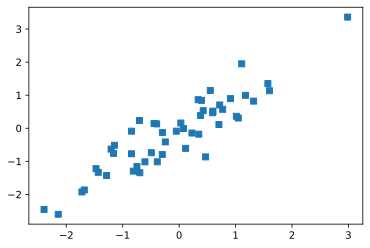

In [2]:
# create some data
N = 50
x = torch.randn(N,1)

# Add some noise to x
y = x + torch.randn(N,1)/2

# Plot to see
plt.plot(x,y, "s")
plt.show()

In [3]:
# Build the Model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
# Define metaparameters
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()

# Optimizer (the flavor of Gradient Descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

In [5]:
# Train the model
numepochs = 500
losses = torch.zeros(numepochs)

# Train the model
for epochi in range(numepochs):

    # forward pass (pass x to the deep learning model and get prediction)
    yHat = ANNreg(x)

    # compute loss (predicted vs observed values)
    loss = lossfun(yHat,y)
    losses[epochi] = loss # for visualization

    # backpropagation
    optimizer.zero_grad() # initialize the gradient to set all derivatives as zero
    loss.backward() # implements backpropagation
    optimizer.step() # calls SDG

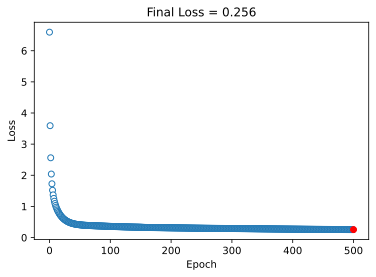

In [6]:
# Show the losses
# Compute the losses manually
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

In [8]:
testloss

tensor(0.2555, grad_fn=<MeanBackward0>)

In [9]:
testloss.detach() # detaches the number testloss.item() is the same

tensor(0.2555)

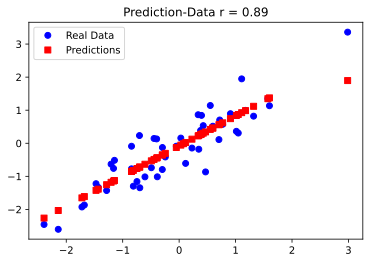

In [11]:
# Plot the data
plt.plot(x,y,"bo", label = "Real Data")
plt.plot(x, predictions.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y.T, predictions.detach().T)[0,1]))
plt.legend()
plt.show()

In [12]:
np.corrcoef(y.T, predictions.detach().T)

array([[1.       , 0.8911799],
       [0.8911799, 1.       ]])

### Additional Explorations

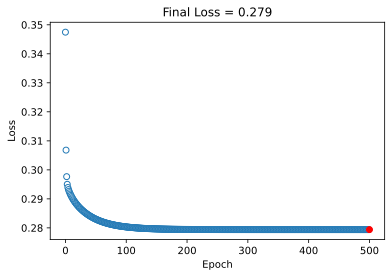

In [21]:
# How much data is "enough"? Try different values of N and see how low the loss gets. 
# Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
n = 15
x2 = torch.randn(n,1)
y2 = x2 + torch.randn(n,1)/2

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yHat2 = ANNreg(x2)
    loss = lossfun(yHat2,y2)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions2 = ANNreg(x2)

testloss = (predictions2 - y2).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

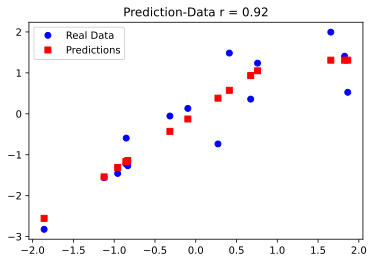

In [22]:
# Plot the data
plt.plot(x2,y2,"bo", label = "Real Data")
plt.plot(x2, predictions2.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y2.T, predictions2.detach().T)[0,1]))
plt.legend()
plt.show()

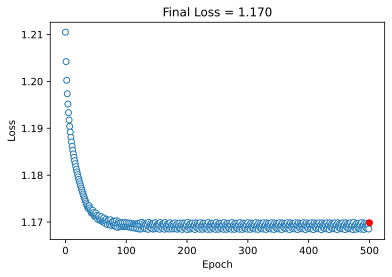

In [23]:
# Change Noise Level
n = 15
x2 = torch.randn(n,1)
y2 = x2 + torch.randn(n,1)

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yHat2 = ANNreg(x2)
    loss = lossfun(yHat2,y2)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions2 = ANNreg(x2)

testloss = (predictions2 - y2).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

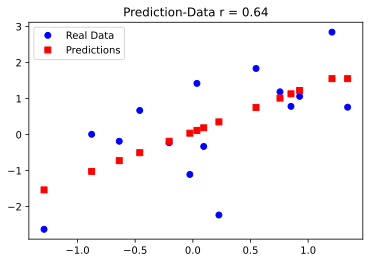

In [24]:
# Plot the data
plt.plot(x2,y2,"bo", label = "Real Data")
plt.plot(x2, predictions2.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y2.T, predictions2.detach().T)[0,1]))
plt.legend()
plt.show()

In [34]:
100*abs((losses.detach()[-1] - losses.detach()[0])/losses.detach()[0])

tensor(3.4676)

In [61]:
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

n = 30
x = torch.randn(n,1)
y = x + torch.randn(n,1)/2

numepochs = 500
losses = torch.zeros(numepochs)
testloss = torch.zeros(100)

for i in range(100):

        # Build the Model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    
    # Define metaparameters
    learningRate = 0.05
    # loss function
    lossfun = nn.MSELoss()
    # Optimizer (the flavor of Gradient Descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

    for epochi in range(numepochs):

        yHat = ANNreg(x)
        loss = lossfun(yHat,y)
#        losses[epochi] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)

    testloss[i] = (predictions - y).pow(2).mean()

In [70]:
torch.count_nonzero(testloss[testloss > 0.25])/len(testloss)

tensor(1.)

## Code Challenge: Manipulate The Regression Slope

Set up and run a parametric experiment where we manipulate the regression slope (relationship btw x and y)

In [71]:
# write a function to train the whole model
def my_ANNreg(x,y, numepochs = 500):

    # Build the Model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    
    # Define metaparameters
    learningRate = 0.05
    # loss function
    lossfun = nn.MSELoss()
    # Optimizer (the flavor of Gradient Descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

    numepochs = numepochs
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yHat = ANNreg(x)

        loss = lossfun(yHat,y)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)

    return predictions, losses

In [72]:
# write a function hat ceates data and outputs x and y
def create_data(m, n = 50):
    """
    m is the slope which we want to vary
    """
    x = torch.randn(n,1)
    y = m*x + torch.randn(n,1)/2
    return x,y

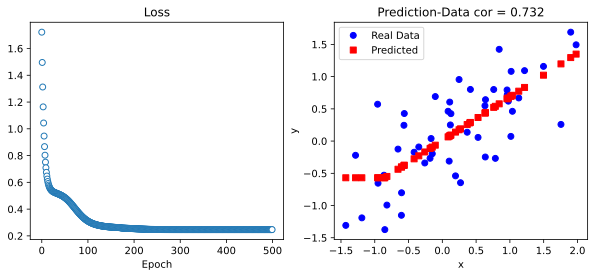

In [78]:
# create an experimental instance
x,y = create_data(0.8)

yHat, losses = my_ANNreg(x,y, numepochs = 500)

fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
ax[0].set_xlabel("Epoch")
ax[0].set_title("Loss")

ax[1].plot(x,y, "bo", label = "Real Data")
ax[1].plot(x,yHat.detach(), "rs", label = "Predicted")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Prediction-Data cor = {:.3f}".format(np.corrcoef(y.T,yHat.detach().T)[0,1]))
ax[1].legend()

plt.show()

In [83]:
# vary the slope from -2 to 2 in 21 steps and train the model by repeating each experiment 50 times
slopes = np.linspace(-2,2,21)
numExp = 50

# Initialize the output matrix
results = np.zeros((len(slopes), numExp, 2))

for slopei in range(len(slopes)):

    for n in range(numExp):

        # create the dataset and run the model
        x,y = create_data(slopes[slopei])
        yHat, losses = my_ANNreg(x,y)

        # Store the final loss and performance

        results[slopei,n,0] = losses[-1]
        results[slopei,n,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]

results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


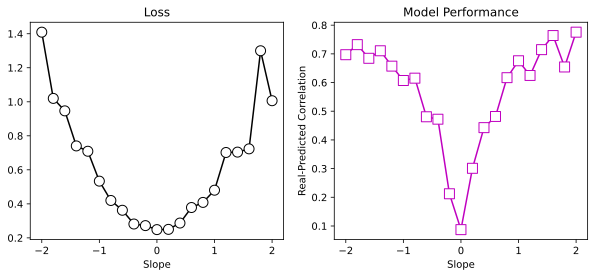

In [85]:
# plot loss and accuracy (correlation yhat,y) as a function of slope
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(slopes, np.mean(results[:,:,0],axis=1), "ko-", markerfacecolor="w", markersize=10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(slopes, np.mean(results[:,:,1],axis=1), "ms-", markerfacecolor="w", markersize=10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real-Predicted Correlation")
ax[1].set_title("Model Performance")

plt.show()